In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as img
import os
from matplotlib import pyplot
import seaborn as sns
from collections import Counter

# Load Dataset and store the pixel values in X

In [2]:
all_images = []
all_image_files = []

In [3]:
dataset_folder_1 = "Datasets/coil-20/coil-20-proc"
image_files_1 = os.listdir(dataset_folder_1)

for each_image in image_files_1:
    if each_image.endswith(".png"):
        im = img.imread(f"{dataset_folder_1}/{each_image}")
        all_images.append(im)

In [4]:
Counter([file.split("__")[0] for file in image_files_1])

Counter({'obj10': 72,
         'obj11': 72,
         'obj12': 72,
         'obj13': 72,
         'obj14': 72,
         'obj15': 72,
         'obj16': 72,
         'obj17': 72,
         'obj18': 72,
         'obj19': 72,
         'obj1': 72,
         'obj20': 72,
         'obj2': 72,
         'obj3': 72,
         'obj4': 72,
         'obj5': 72,
         'obj6': 72,
         'obj7': 72,
         'obj8': 72,
         'obj9': 72})

In [5]:
all_image_files = image_files_1

In [6]:
len(all_image_files)

1440

In [7]:
n_images = len(all_images)

In [8]:
all_images[0].shape

(128, 128)

# Plot sample Images

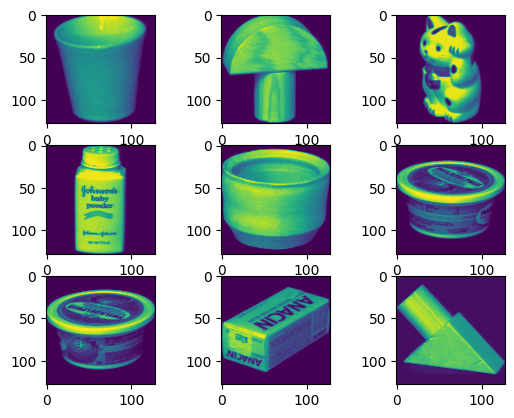

In [9]:
#plt.subplots(3,3)
fig = plt.figure()
rows, columns = 3,3

num = 1
for k in np.random.choice(range(1,n_images), 9):
    fig.add_subplot(rows, columns, num)
    plt.imshow(all_images[k])
    num+=1



# For complexity, we can stick to grayscale

In [10]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

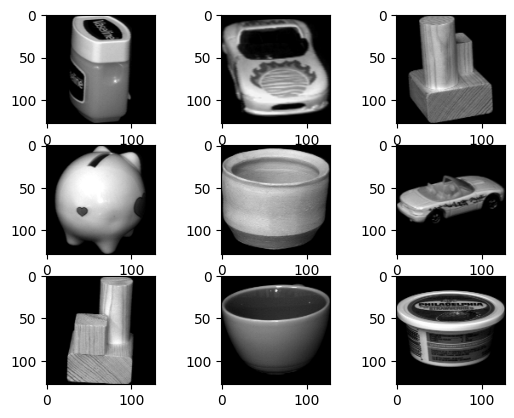

In [11]:
#plt.subplots(3,3)
fig = plt.figure()
rows, columns = 3,3

num = 1
for k in np.random.choice(range(1,n_images), 9):
    fig.add_subplot(rows, columns, num)
    image = all_images[k]
    plt.imshow(image, cmap='gray')
    num+=1



# Plot image of same object from different angles

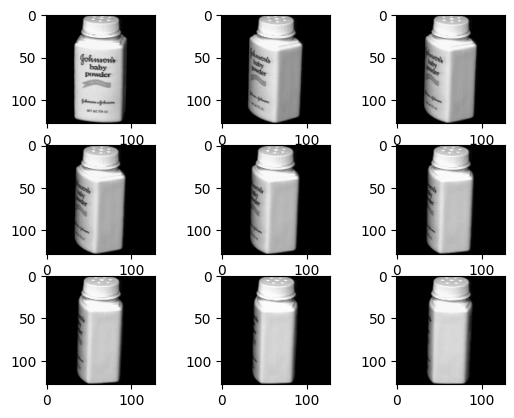

In [12]:
fig = plt.figure()
rows, columns = 3,3

image_name = f"obj{np.random.randint(1,20)}__1.png"
idx = all_image_files.index(image_name)
k=0

while k < rows*columns:
    fig.add_subplot(rows, columns, k+1)
    image = all_images[idx + k]
    plt.imshow(image, cmap='gray')
    k+=1

# Clustering -> we will be using Grayscale image to simplify problem
- KMeans
- Gaussian Mixture Model 

In [13]:
all_images[0].flatten()

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [14]:
X = np.vstack([img.flatten() for img in all_images])

In [15]:
X[0].shape, len(X)

((16384,), 1440)

In [16]:
X.max(),  np.array(X).min()

(1.0, 0.0)

# Get Metrics

In [17]:
def get_metrics(model, X):
    cluster_labels = model.predict(X)

    # Record Inertia
    inertia = model.inertia_
    
    # Record Silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    # Compute silhouette values for each datapoint
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    return inertia, silhouette_avg, sample_silhouette_values

## 1. KMeans

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
wcss = []
silhouette_scores = []
silhouette_sample_values = []
cluster_range = range(2, 30)

for i in range(2, 30):
    print (i)
    kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 42, n_init=10, algorithm='elkan')
    kmeans.fit(X)

    inertia, silhouette_avg, sample_silhouette_values = get_metrics(kmeans, X)

    wcss.append(inertia)
    silhouette_scores.append(silhouette_avg)
    silhouette_sample_values.append(sample_silhouette_values)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


### Fig 1. Inertia

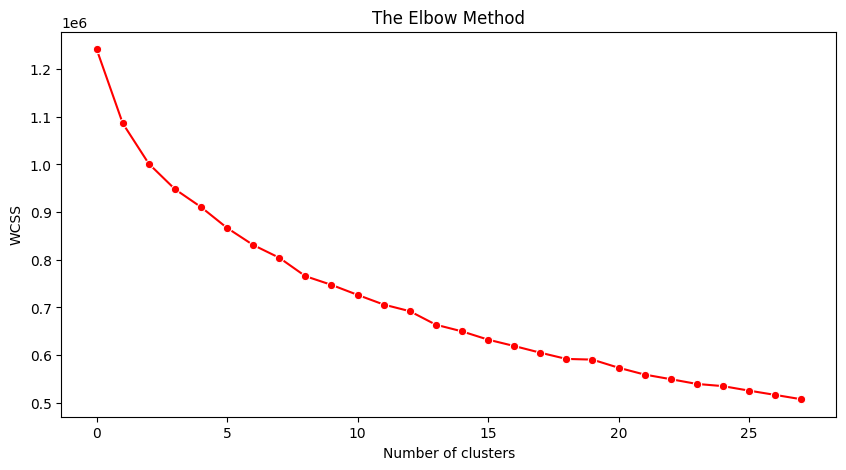

In [25]:
plt.figure(figsize=(10,5))
sns.lineplot(wcss, marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Optimal K

In [30]:
deltas = np.diff(wcss, 2)
optimal_k = np.argmin(deltas) + 2
optimal_k

20

In [31]:
deltas

array([ 70513.     ,  31619.75   ,  15691.75   ,  -6257.25   ,
         8056.0625 ,   8973.9375 , -11773.8125 ,  20266.875  ,
        -2695.625  ,    709.1875 ,   6393.0625 , -14493.625  ,
        14440.3125 ,  -3424.75   ,   4018.6875 ,   -667.875  ,
          939.     ,  11610.4375 , -15537.     ,   2632.1875 ,
         4718.1875 ,   -320.3125 ,   5391.6875 ,  -4876.3125 ,
          515.59375,   -143.875  ])

In [33]:
top_5_k = (np.argsort(deltas) + 2)[:5]
top_5_k

array([20, 13,  8,  5, 25], dtype=int64)

In [35]:
kmeans = KMeans(n_clusters = 20, init = "k-means++", random_state = 42,n_init=10, algorithm='elkan')
kmeans.fit(X)
cluster_labels = kmeans.predict(X)

### Fig 2. Silhouette Score

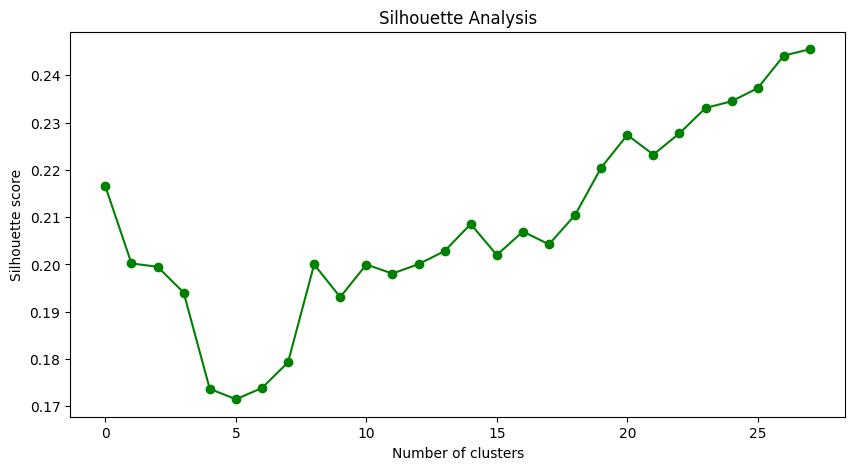

In [36]:
plt.figure(figsize=(10,5))
plt.plot( silhouette_scores, marker='o', color='green')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Analysis')
plt.show()

### Fig 3. Silhouette Analysis

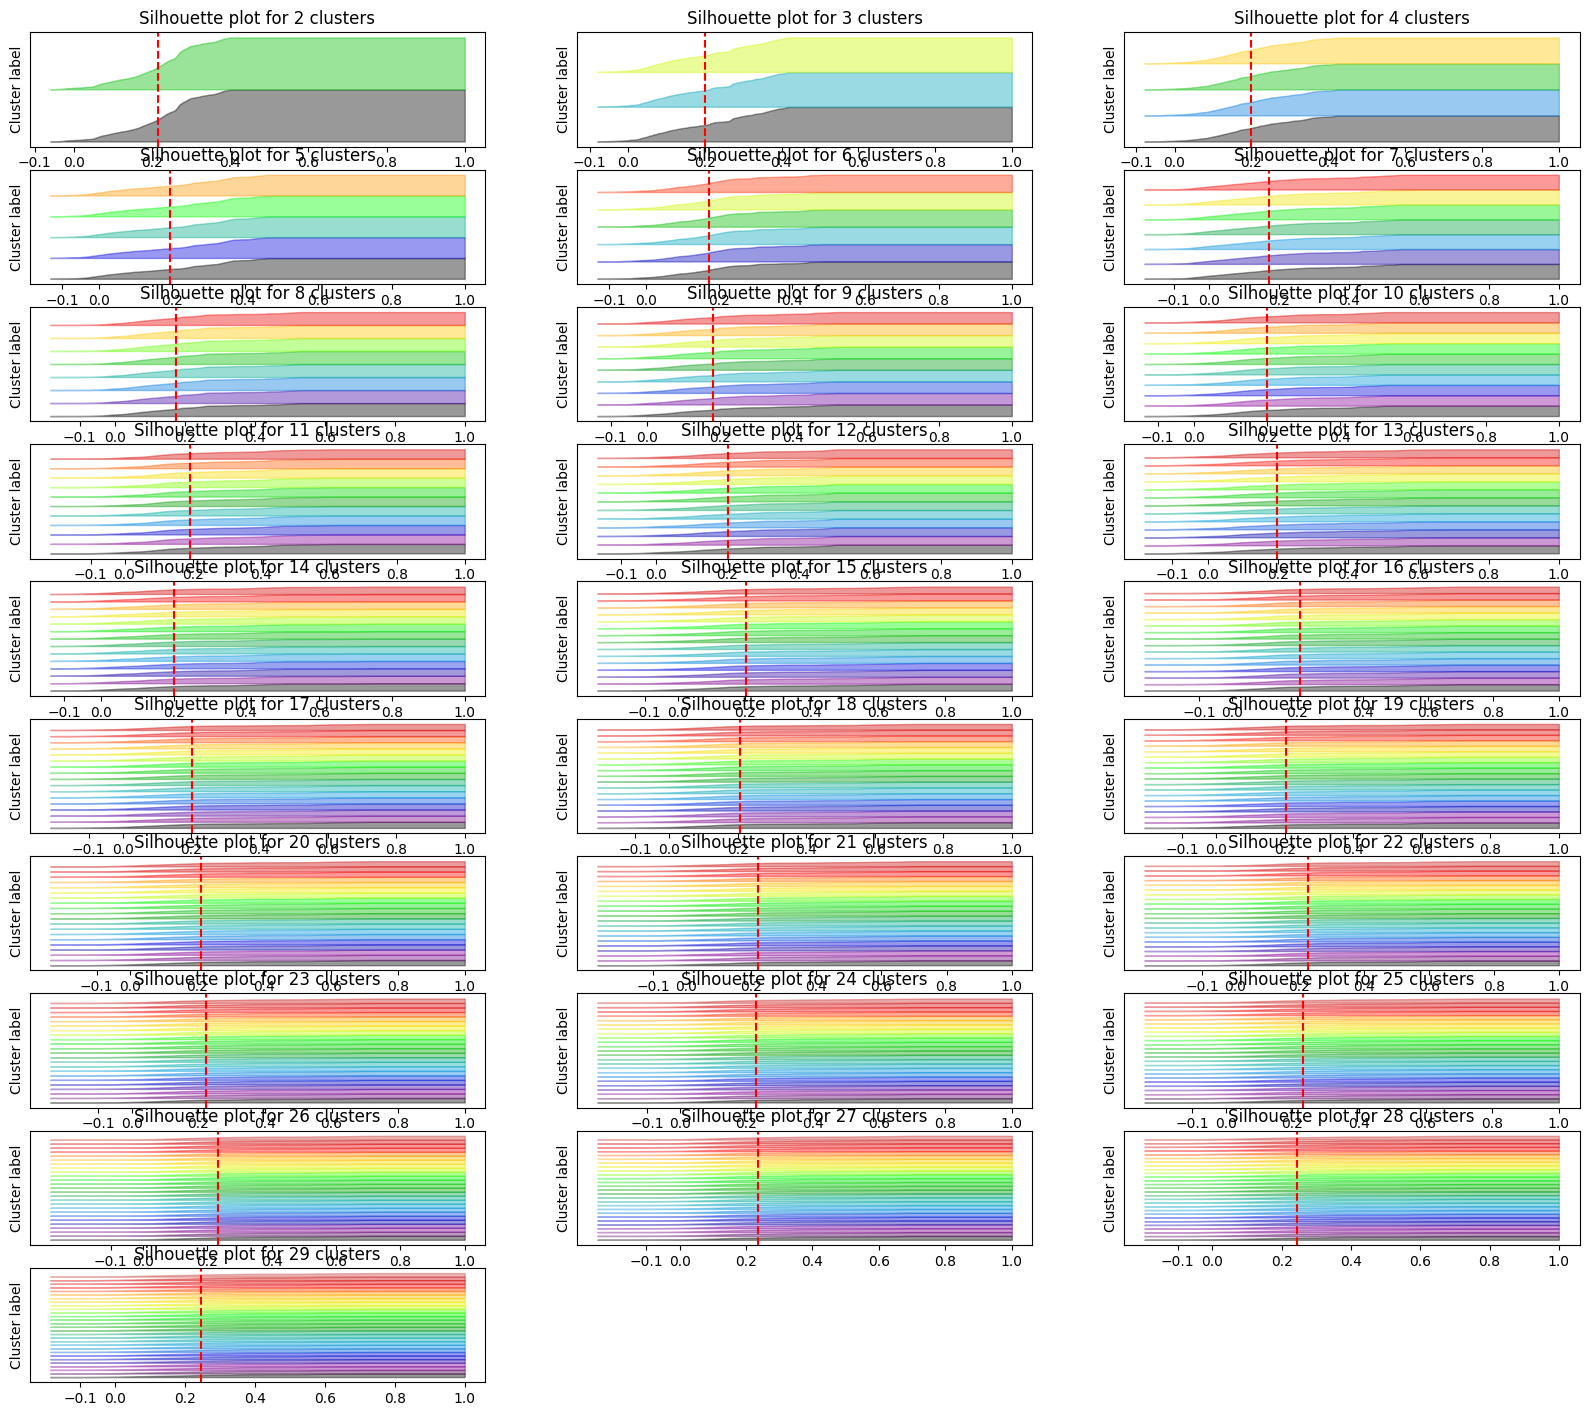

In [37]:
# Plot silhouette samples
plt.figure(figsize=(20,15))
cluster_range = range(2, 30)
for i, n_clusters in enumerate(cluster_range):
    plt.subplot(10, 3, i + 1)
    y_lower = 10
    for j in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster j and sort them
        ith_cluster_silhouette_values = silhouette_sample_values[i]
        #[cluster_labels == j]
        ith_cluster_silhouette_values.sort()
        size_cluster_j = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j
        color = plt.cm.nipy_spectral(float(j) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 1, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.4)
        #plt.text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))
        y_lower = y_upper + 10

    plt.title("Silhouette plot for {} clusters".format(n_clusters))
    #plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")
    plt.axvline(x=silhouette_scores[i], color="red", linestyle="--")
    plt.yticks([])
    plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    #plt.legend()
plt.subplots_adjust(#left=0.1,
                    bottom=0.05, 
                    #right=0.9, 
                    top=0.95, 
                    #wspace=0.4, 
                    #hspace=0.4
                    )
plt.show()

### Fig 4. Cluster Distribution

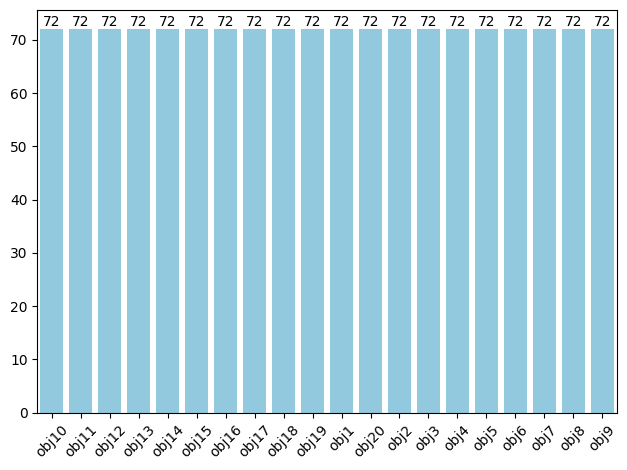

In [38]:
from collections import Counter
original_dist = Counter([file.split("__")[0] for file in image_files_1])
ax = sns.barplot(x=list(original_dist.keys()), y=list(original_dist.values()), color='skyblue')
plt.xticks(rotation=45)
plt.tight_layout()

for i in ax.containers:
    ax.bar_label(i,)

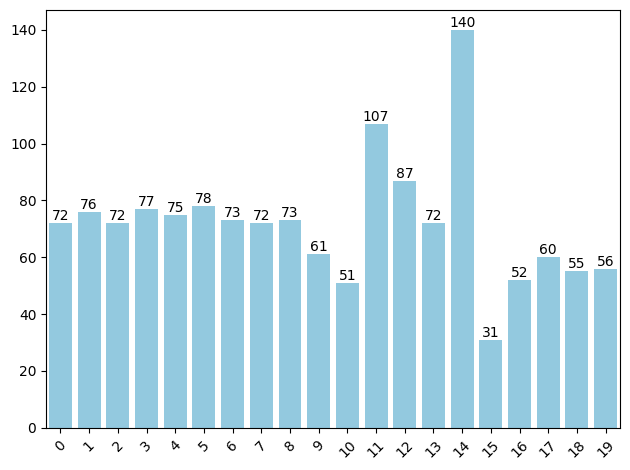

In [39]:
cluster_dict = Counter(cluster_labels)
ax = sns.barplot(x=list(cluster_dict.keys()), y=list(cluster_dict.values()), color='skyblue')
plt.xticks(rotation=45)
plt.tight_layout()

for i in ax.containers:
    ax.bar_label(i,)

#### Ideally all clusters should have been equivalent to grounf truth and should have contained 72 images. 
#### What would be interesting to see is:
- Which cluster has images greater than 72 - only 2 with count of 74
- Which cluster has images exactly = 72 (do all images belong to same class)
- Which cluster has lesser number of clusters 

In [41]:
def plot_cluster(cluster_num, rows, columns):
    test_images = np.where(cluster_labels == cluster_num)
    fig = plt.figure()
    for k, each_img_idx in enumerate(test_images[0]):
        fig.add_subplot(rows, columns, k+1)
        image = all_images[each_img_idx]
        plt.imshow(image, cmap='gray')

### Cluster Count ==72

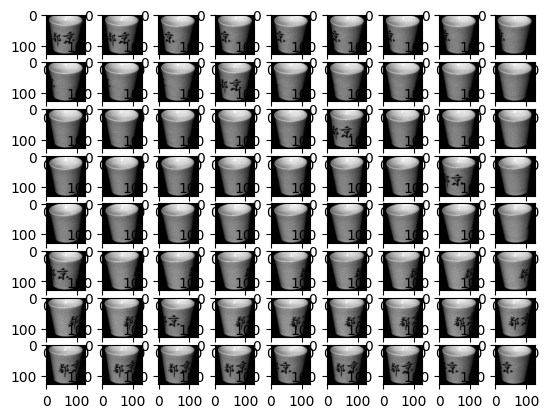

In [42]:
plot_cluster(cluster_num=2, rows=8,columns=9)

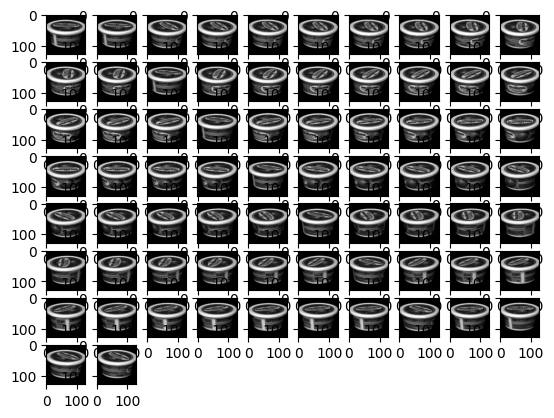

In [43]:
plot_cluster(cluster_num=7, rows=8,columns=10)

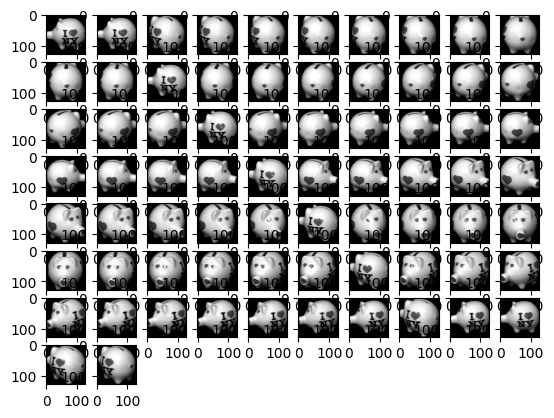

In [44]:
plot_cluster(cluster_num=13, rows=8,columns=10)

### Cluster Count > 72

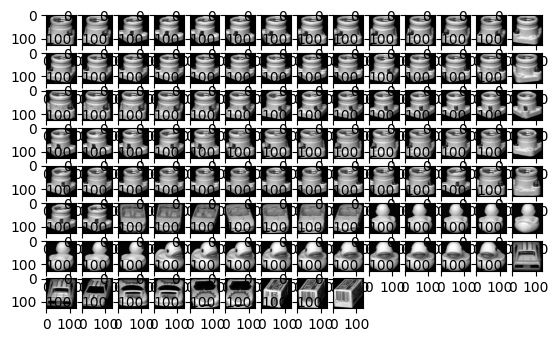

In [46]:
plot_cluster(cluster_num=11, rows=10,columns=14)

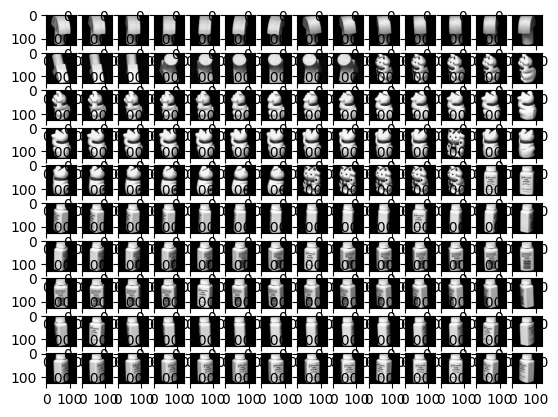

In [47]:
plot_cluster(cluster_num=14, rows=10,columns=14)

### Cluster Count < 72

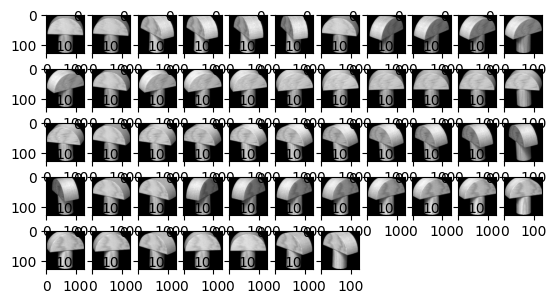

In [48]:
plot_cluster(cluster_num=10, rows=7,columns=11)

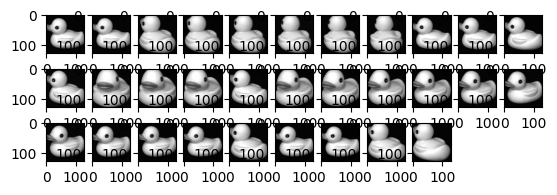

In [49]:
plot_cluster(cluster_num=15, rows=7,columns=11)

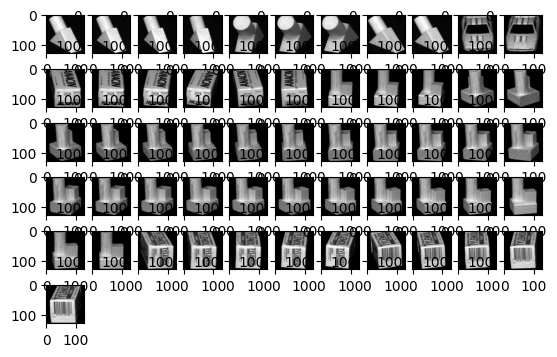

In [50]:
plot_cluster(cluster_num=19, rows=7,columns=11)

# Analysis of Clusters

- Plot the centroid of each cluster (image)
- See if we get same results in using GMM (Cluster Stability). 
Evaluate the consistency and robustness of clusters across different clustering approaches and choose the most suitable one based on the analysis.
- Clustering validation metrics such as silhouette score, Davies–Bouldin index, or Calinski-Harabasz index to assess the compactness and separation of clusters. 
Higher silhouette scores and lower Davies–Bouldin or Calinski-Harabasz values indicate better clustering quality.


### 1. Plot Centroid

In [51]:
kmeans = KMeans(n_clusters = 20, init = "k-means++", random_state = 42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [52]:
kmeans.cluster_centers_

array([[ 9.3132257e-10,  9.3132257e-10,  9.3132257e-10, ...,
         1.1641532e-09, -2.3283064e-10,  9.3132257e-10],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         2.3283064e-10, -2.3283064e-10,  0.0000000e+00],
       [ 2.3283064e-10,  2.3283064e-10,  2.3283064e-10, ...,
         6.9849193e-10,  4.6566129e-10,  2.3283064e-10],
       ...,
       [ 8.3006527e-03,  8.3006527e-03,  8.3006527e-03, ...,
         8.3006555e-03,  8.3006527e-03,  8.3006527e-03],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -2.3283064e-10, -2.3283064e-10,  0.0000000e+00],
       [ 3.9215684e-03,  3.9215684e-03,  3.9215684e-03, ...,
         3.9215684e-03,  3.9215693e-03,  3.9215684e-03]], dtype=float32)

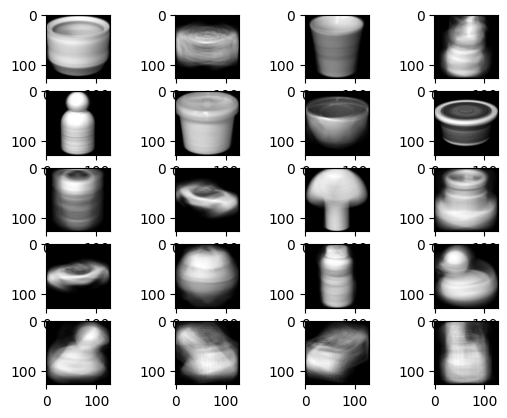

In [53]:
fig = plt.figure()
rows, columns = 5,4

for k, each_center in enumerate(kmeans.cluster_centers_):
    fig.add_subplot(rows, columns, k+1)
    img_center = np.array(each_center.reshape(128, 128))
    plt.imshow(img_center, cmap='gray')

# 2. Comparing Ground Truth with Generated Clusters

In [58]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score
y_true = [int(file.split("__")[0].replace("obj","")) for file in image_files_1]

In [60]:
ari = adjusted_rand_score(y_true, cluster_labels)
nmi = normalized_mutual_info_score(y_true, cluster_labels)
fmi = fowlkes_mallows_score(y_true, cluster_labels)

In [61]:
ari, nmi, fmi

(0.6234998554558994, 0.7892479623104344, 0.6435343098755233)